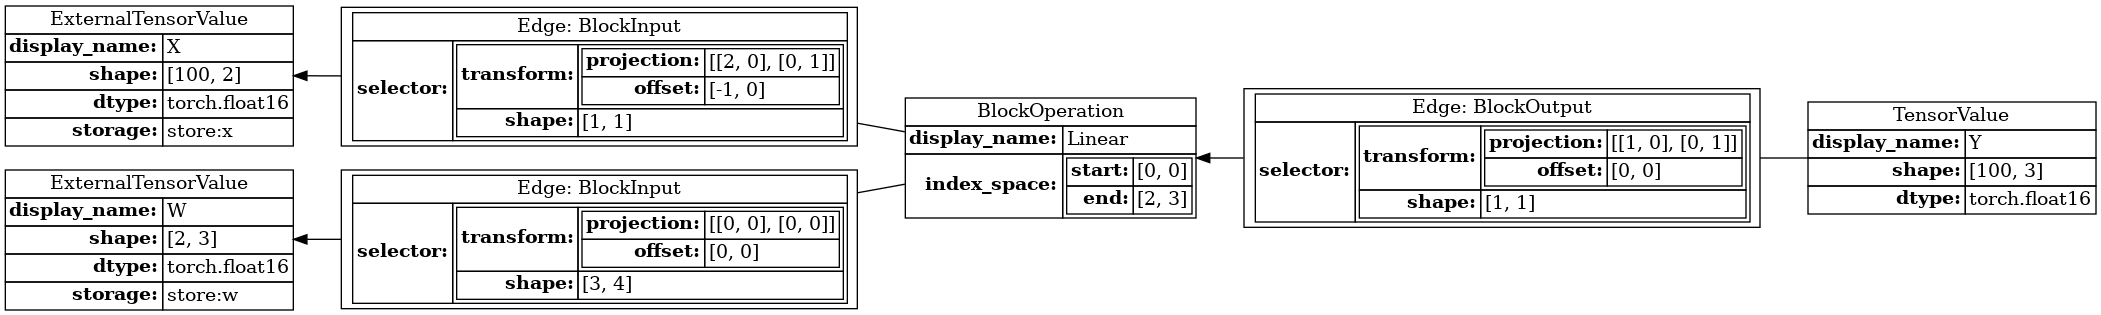

In [2]:
import numpy as np

from tapestry.expression_graph import (
    BlockOperation,
    GraphDoc,
    ExternalTensorValue,
    TensorValue,
)
from tapestry.jupyter_utils import display_graph_doc
from tapestry.zspace import ZRange, ZRangeMap, ZTransform

g = GraphDoc()

x = g.add_node(
    ExternalTensorValue(
        display_name="X",
        shape=np.array([100, 2]),
        dtype="torch.float16",
        storage="store:x",
    )
)

w = g.add_node(
    ExternalTensorValue(
        display_name="W",
        shape=np.array([2, 3]),
        dtype="torch.float16",
        storage="store:w",
    )
)

y = g.add_node(
    TensorValue(
        display_name="Y",
        shape=np.array([100, 3]),
        dtype="torch.float16",
    )
)

linear = g.add_node(
    BlockOperation(
        display_name="Linear",
        index_space=ZRange([2, 3]),
    )
)

g.add_node(
    BlockOperation.BlockInput(
        source_node_id=linear.node_id,
        target_node_id=x.node_id,
        selector=ZRangeMap(
            transform=ZTransform(
                projection=[[2, 0], [0, 1]],
                offset=[-1, 0],
            ),
            shape=[1, 1],
        ),
    )
)

g.add_node(
    BlockOperation.BlockInput(
        source_node_id=linear.node_id,
        target_node_id=w.node_id,
        selector=ZRangeMap(
            transform=ZTransform(
                projection=[[0, 0], [0, 0]],
                offset=[0, 0],
            ),
            shape=[3, 4],
        ),
    )
)

g.add_node(
    BlockOperation.BlockOutput(
        source_node_id=y.node_id,
        target_node_id=linear.node_id,
        selector=ZRangeMap(
            transform=ZTransform(
                projection=[[1, 0], [0, 1]],
                offset=[0, 0],
            ),
            shape=[1, 1],
        ),
    )
)

display_graph_doc(g)